<a href="https://colab.research.google.com/github/onostosia/heheh/blob/master/plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа №1. "Моделирование распространения пандемии средствами Python"

In [ ]:
import pandas as pd
import plotly.express as px
import requests
import plotly.graph_objects as go
import geopandas as gpd
import seaborn as sns
import time
from google.colab import files

#считываем данные из файла
files.upload()

Saving Countries.csv to Countries.csv


{'Countries.csv': b',country,Log,Lon,code,pop,iso_alfa,Country code,GDP\r\n0,Afghanistan,34.51666667,69.18333299999999,AF,38041754,AFG,4,700.0\r\n1,Albania,41.31666667,19.816667000000002,AL,2880917,ALB,8,4500.0\r\n2,Algeria,36.75,3.05,DZ,43053054,DZA,12,6000.0\r\n3,American Samoa,-14.26666667,-170.7,AS,55312,ASM,16,8000.0\r\n4,Andorra,42.5,1.516667,AD,77142,AND,20,19000.0\r\n5,Angola,-8.833333332999999,13.216667000000001,AO,31825295,AGO,24,1900.0\r\n6,Anguilla,18.21666667,-63.05,AI,14869,AIA,660,8600.0\r\n7,Antigua and Barbuda,17.11666667,-61.85,AG,97118,ATG,28,11000.0\r\n8,Argentina,-34.58333333,-58.666667000000004,AR,44780677,ARG,32,11200.0\r\n9,Armenia,40.16666667,44.5,AM,2957731,ARM,51,3500.0\r\n10,Aruba,12.51666667,-70.033333,AW,106314,ABW,533,28000.0\r\n11,Australia,-35.26666667,149.133333,AU,25203198,AUS,36,29000.0\r\n12,Austria,48.2,16.366667,AT,8955102,AUT,40,30000.0\r\n13,Azerbaijan,40.38333333,49.866667,AZ,10047718,AZE,31,3400.0\r\n14,Bahamas,25.08333333,-77.35,BS,389482,BHS

In [ ]:
df = pd.read_csv('Countries.csv')

In [ ]:
#заливка (population)
fig = px.choropleth(df,
                    locations="iso_alfa",
                    color = "pop",
                    color_continuous_scale="OrRd",
                    hover_name = "country",
                    range_color =[10000,199999999]
                    )

fig.show()



In [ ]:
#population= df['pop']
df['Inf'] = 0
df['Rec'] = 0
#таблица стран с соответ. данными
listOfCountries = df['country']

for i in range(1,21):
    s = 'Inf'+str(i)
    df[s]=0

df.head()

,Unnamed: 0,country,Log,Lon,code,pop,iso_alfa,Country code,GDP,Inf,Rec,Inf1,Inf2,Inf3,Inf4,Inf5,Inf6,Inf7,Inf8,Inf9,Inf10,Inf11,Inf12,Inf13,Inf14,Inf15,Inf16,Inf17,Inf18,Inf19,Inf20
0,0,Afghanistan,34.516667,69.183333,AF,38041754,AFG,4,700.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Albania,41.316667,19.816667,AL,2880917,ALB,8,4500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Algeria,36.750000,3.050000,DZ,43053054,DZA,12,6000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,American Samoa,-14.266667,-170.700000,AS,55312,ASM,16,8000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Andorra,42.500000,1.516667,AD,77142,AND,20,19000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
import numpy
import scipy.integrate

sus = []
inf = []
rec = []

def SIR_model(y, t, betta, gamma):
    S, I, R = y
    
    dS_dt = -betta*S*I
    dI_dt = betta*S*I - gamma*I
    dR_dt = gamma*I
    
    sus.append(dS_dt)
    inf.append(dI_dt)
    rec.append(dR_dt)
    
    return ([dS_dt, dI_dt, dR_dt])

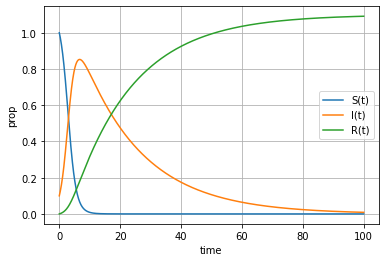

In [ ]:
#начальные параметры
S0 = 1
I0 = 0.1
R0 = 0.0

beta = 0.75
gamma = 0.05

#Time vector
t = numpy.linspace(0,100,1000)

solution = scipy.integrate.odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
solution = numpy.array(solution) 

#Plot
plt.figure(figsize=[6,4])
plt.plot(t, solution[:,0], label = 'S(t)')
plt.plot(t, solution[:,1], label = 'I(t)')
plt.plot(t, solution[:,2], label = 'R(t)')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('prop')
plt.show()

In [ ]:
currentPOP = 0
currentNum = 0

for i in range(len(df)):
    if df['country'][i] == str('China'):
        currentPOP = df['pop'][i]
        currentNum = i

while i < len(solution[:,1]):
    
    df['Inf'][currentNum] = currentPOP*solution[:,1][i]
    i+=50
    # create map
    fig = px.choropleth(df,
                    locations="iso_alfa",
                    color = "Inf",
                    color_continuous_scale="OrRd",
                    hover_name = "country",
                    range_color =[0,currentPOP]
                    )
    j = 0
    if(i == 50):
        j = 1
    else:
        j = i
        j -= 50
    day = 'day: '+ str(j)
    fig.update_layout(title_text = day)

    filepath = os.path.join(output_path, str(i)+'_violence.png')
    fig.write_image(str(i)+'_violence.png')
fig.show()